<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 20px; height: 55px"> 

# Capstone Project: Hate Speech Analysis

Note: This is part 3 of the code notebook covering the following :-

1. [Problem Statement](#1.-Problem-Statement)
2. [Data Scrapping](#2.-Data-Scrapping)
3. [Exploratory Data Analysis](#3.-Exploratory-Data-Analysis)
4. [Summary of Notebook 3](#4.-Summary-of-Notebook-3)

A sub-goal of this project is to pick out words related to hate speech using Streamlit API. To do so, we shall scrap data from the [HateBase](https://hatebase.org/), which is an online respository built to help organisations identified hate words. 

## 1. Library Imports

In [1]:
from bs4 import BeautifulSoup
import json
import matplotlib.pyplot as plt
import pandas as pd
import requests
import seaborn as sns

## 2. Data Scrapping

Given that the language of our dataset is english, we shall only focus on scrapping hate words from the english respository. To do so, we shall proceed with the following :- 
1. Loop through each page of the english respository;
2. Extract the entries of hate words;
3. Filter out those entries with words that are offensive (words are scaled from mildly offensive to extremely offensive);
4. Pick out offensive hate words and its ratings; 
5. Create a dataframe to capture hate words and its ratings; and 
6. Import out a text file for Streamlit API.

In [2]:
# Step 1 & 2: Looping through each page of the english respository and extract
entry_list = []
for num_results in range(1,33):
    url = f'https://hatebase.org/search_results/language_id=eng%7Cpage={num_results}'
    print(url)
    res = requests.get(url)
    soup = BeautifulSoup(res.content, 'lxml')
    for i in range(len(soup.find_all('tr'))):
        entry_list.append(soup.find_all('tr')[i].get_text())

https://hatebase.org/search_results/language_id=eng%7Cpage=1
https://hatebase.org/search_results/language_id=eng%7Cpage=2
https://hatebase.org/search_results/language_id=eng%7Cpage=3
https://hatebase.org/search_results/language_id=eng%7Cpage=4
https://hatebase.org/search_results/language_id=eng%7Cpage=5
https://hatebase.org/search_results/language_id=eng%7Cpage=6
https://hatebase.org/search_results/language_id=eng%7Cpage=7
https://hatebase.org/search_results/language_id=eng%7Cpage=8
https://hatebase.org/search_results/language_id=eng%7Cpage=9
https://hatebase.org/search_results/language_id=eng%7Cpage=10
https://hatebase.org/search_results/language_id=eng%7Cpage=11
https://hatebase.org/search_results/language_id=eng%7Cpage=12
https://hatebase.org/search_results/language_id=eng%7Cpage=13
https://hatebase.org/search_results/language_id=eng%7Cpage=14
https://hatebase.org/search_results/language_id=eng%7Cpage=15
https://hatebase.org/search_results/language_id=eng%7Cpage=16
https://hatebase.

In [3]:
# Put the list of entries into a dataframe
# Step 3: Filtering out offensive words
entry_df = pd.DataFrame(entry_list, columns = ['entry'])
entry_df = entry_df[entry_df['entry'].str.contains("offensive")]

In [4]:
print(f'Number of Offensive Words: {len(entry_df)}.')

Number of Offensive Words: 944.


In [5]:
# Printing a sample of the entry
entry_df['entry'][0]

'\n\n6 gorillion\n\nEnglish\n\n1 sighting (Recent)\n\n  Highly offensive\n\n'

In [6]:
# Step 4: Picking out hate words
hatewords_list = []
for i in entry_df['entry']:
    hatewords_list.append(str(i).split("\n\n")[1].split("\n")[0])
print(hatewords_list[:5])

['6 gorillion', 'abbo', 'abbos', 'ABC', 'ABCD']


In [7]:
# Step 4: Picking out the ratings of hate words
offensive_list = []
for i in entry_df['entry']:
    offensive_list.append(str(i).split("\n\n")[4])
print(offensive_list[:5])

['  Highly offensive', '\n  Extremely offensive', '  Extremely offensive', '  Mildly offensive', '\n  Mildly offensive']


In [8]:
# Step 5: Creating a dataframe to capture the information
hatewords_df = pd.DataFrame(hatewords_list, columns = ['hatewords'])
hatewords_df['offensive_ratings'] = offensive_list

In [9]:
# Cleaning the offensive ratings
hatewords_df['offensive_ratings'] = hatewords_df['offensive_ratings'].str.replace("\n","")
hatewords_df['offensive_ratings'] = hatewords_df['offensive_ratings'].str. strip()

In [10]:
hatewords_df.head()

,hatewords,offensive_ratings
0,6 gorillion,Highly offensive
1,abbo,Extremely offensive
2,abbos,Extremely offensive
3,ABC,Mildly offensive
4,ABCD,Mildly offensive


In [11]:
hatewords_dict = {}
for i in hatewords_df.T.to_dict():
    hatewords_dict[hatewords_df.T.to_dict()[i]['hatewords']] = hatewords_df.T.to_dict()[i]['offensive_ratings']

In [12]:
# Step 6: Exported dict to build Streamlit API
with open('hatewords.txt', 'w') as convert_file:
     convert_file.write(json.dumps(hatewords_dict))

## 3. Exploratory Data Analysis

We shall now do a quick EDA on the 944 hate words scraped.

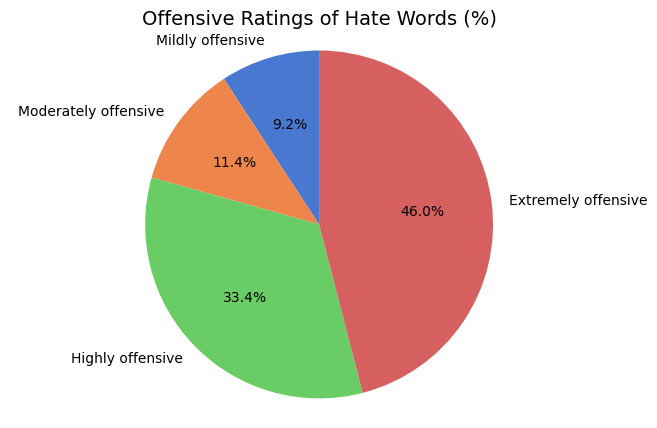

In [13]:
labels = hatewords_df['offensive_ratings'].value_counts(normalize=True, ascending=True).index
sizes = hatewords_df['offensive_ratings'].value_counts(normalize=True, ascending=True)
plt.figure(figsize=(8,5))
colors = sns.color_palette('muted')[0:5]
plt.pie(sizes,labels=labels, autopct='%1.1f%%', startangle=90, colors = colors)
plt.axis('equal')
plt.title('Offensive Ratings of Hate Words (%)', fontsize=14);

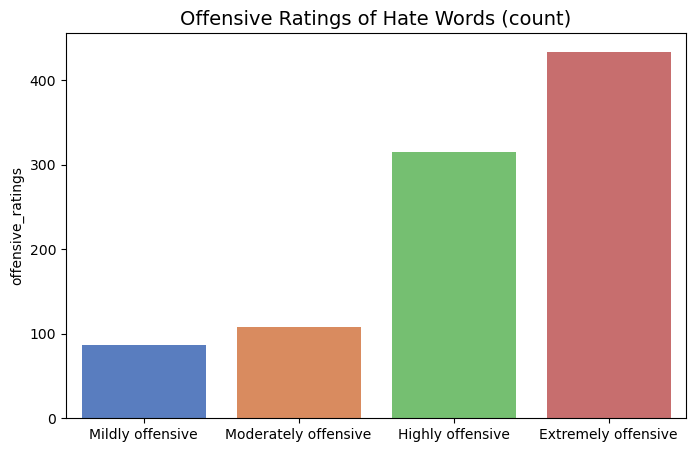

In [14]:
plt.figure(figsize=(8,5))
ax= sns.barplot(x = hatewords_df['offensive_ratings'].value_counts(ascending=True).index, y = hatewords_df['offensive_ratings'].value_counts(ascending=True), palette='muted')
plt.title('Offensive Ratings of Hate Words (count)', fontsize=14)
plt.yticks(fontsize=10)
plt.xticks(fontsize=10)
plt.show();

Based on the graphs, most words belong to the extremely offensive and highly offensive categories. This suggests that any text found with these words would probably be useful to pick out hateful content.

## 4. Summary of Notebook 3

In short, this notebook managed to achieve the following: 
1. Scraped all the english hate words (total: 944) from [HateBase](https://hatebase.org/) website;
2. Exported dictionary of hate words with their offensive ratings for Streamlit API; and 
3. Provided brief EDA on the hate words. 

Note: English hate words scraped from [HateBase](https://hatebase.org/) website was on 16 Nov 22. More hate words might have been contributed since then. 